In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [11]:
df = pd.read_csv('E:\\Neoron\\Programming_Practice\\Machine_Learning_Project\\wine_quality_prediction\\dataset\\data.csv')
df.head(1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
# cheek data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [13]:
# cheek null value

df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [14]:
# cheek duplicate value
df.duplicated().sum()

240

In [15]:
# drop duplicate value
df.drop_duplicates(inplace=True)

C:\Users\nasir\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nasir\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nasir\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nasir\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

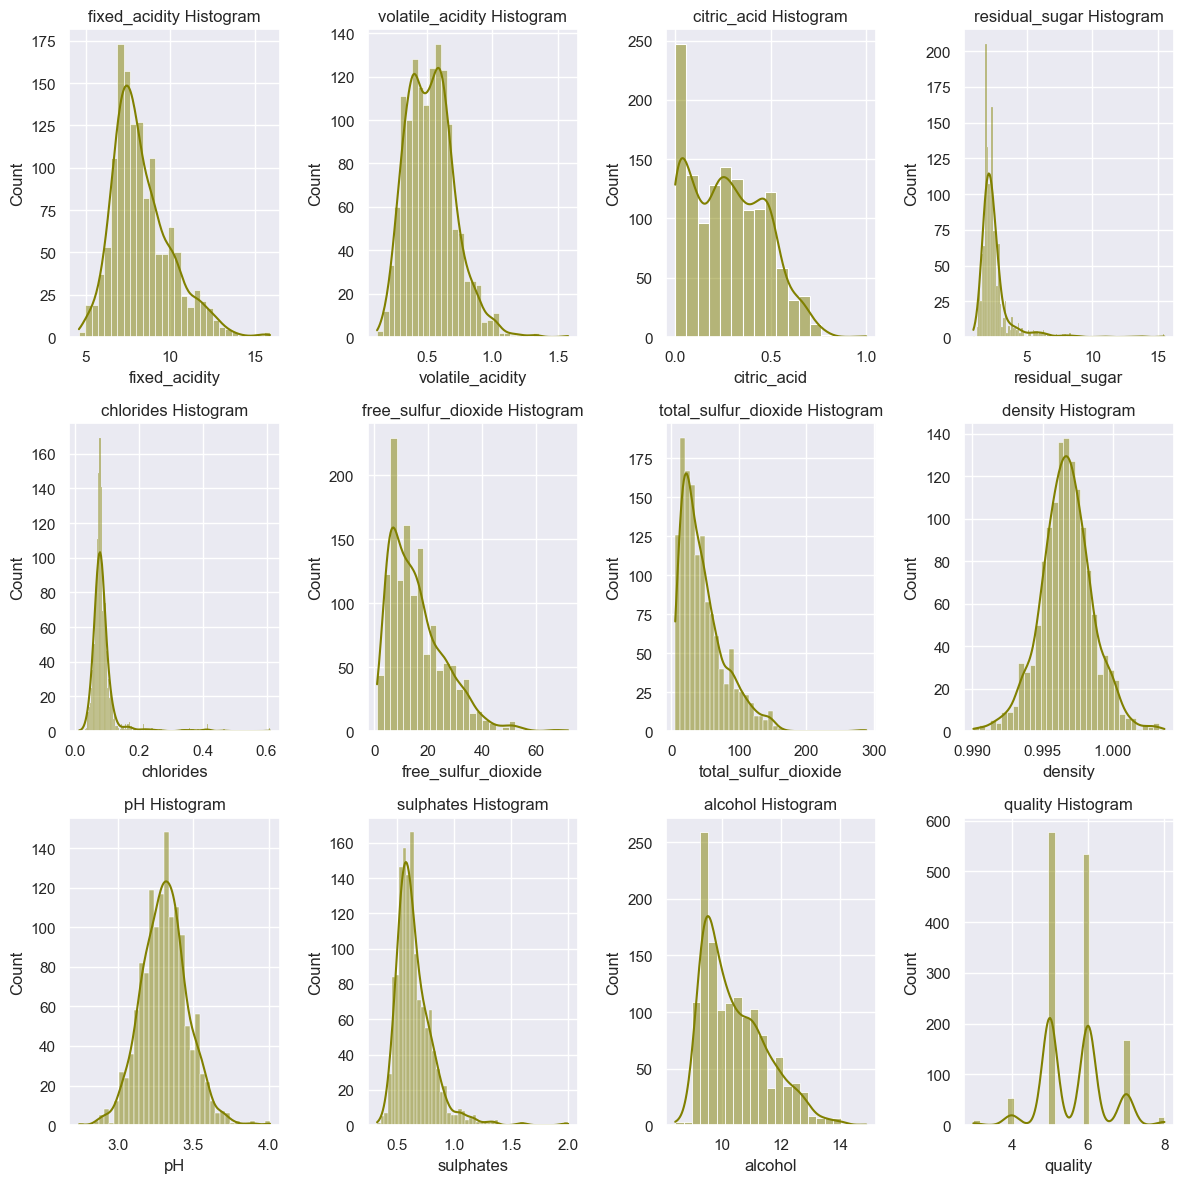

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_histogram_grid(data, columns, figsize=(12,12)):
    # Set a grey background
    sns.set(style="darkgrid")

    # Create a 2x2 grid of subplots
    num_columns = min(len(columns), 4)
    num_rows = (len(columns) - 1) // 4 + 1
    fig, axs = plt.subplots(num_rows, num_columns, figsize=figsize)

    # Flatten the axes array for easier iteration
    axs = axs.ravel()

    # Loop through the specified columns and create histograms
    for i, column in enumerate(columns):
        sns.histplot(data=data, x=column, kde=True, color="olive", ax=axs[i])
        axs[i].set_title(f"{column} Histogram")

    # Remove any empty subplots
    for i in range(len(columns), len(axs)):
        fig.delaxes(axs[i])

    # Adjust spacing
    plt.tight_layout()

    # Show the plot
    plt.show()


plot_histogram_grid(df, df.columns)

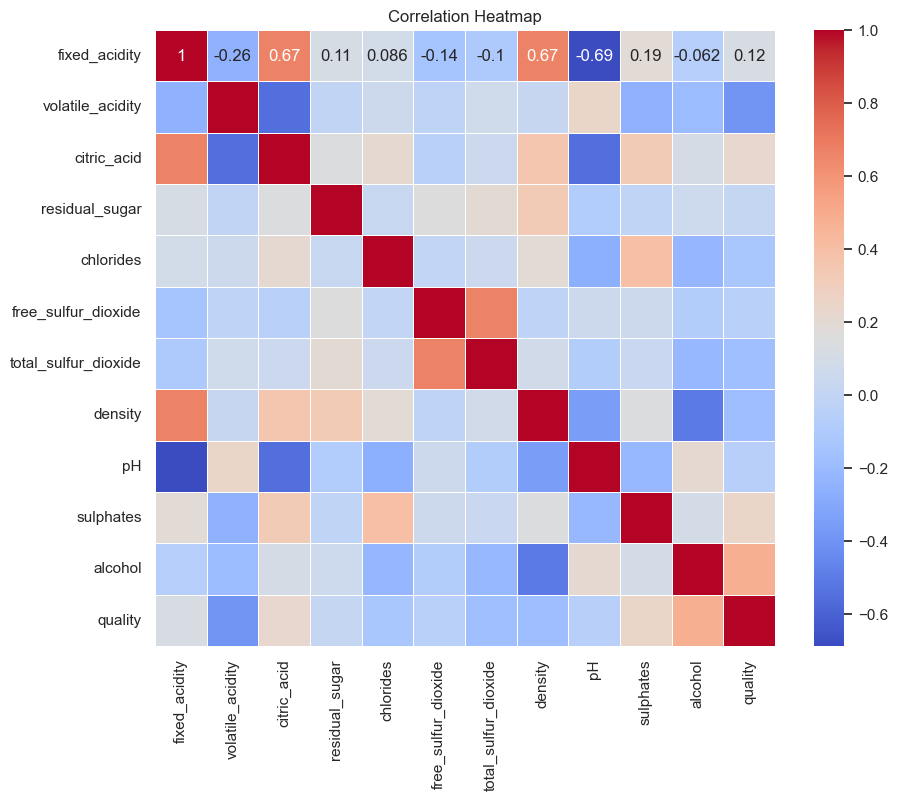

In [51]:
# cheek correlation

def plot_correlation(data):
    # Calculate the correlation matrix
    corr_matrix = data.corr()

    # Create a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title("Correlation Heatmap")
    plt.show()

plot_correlation(df)

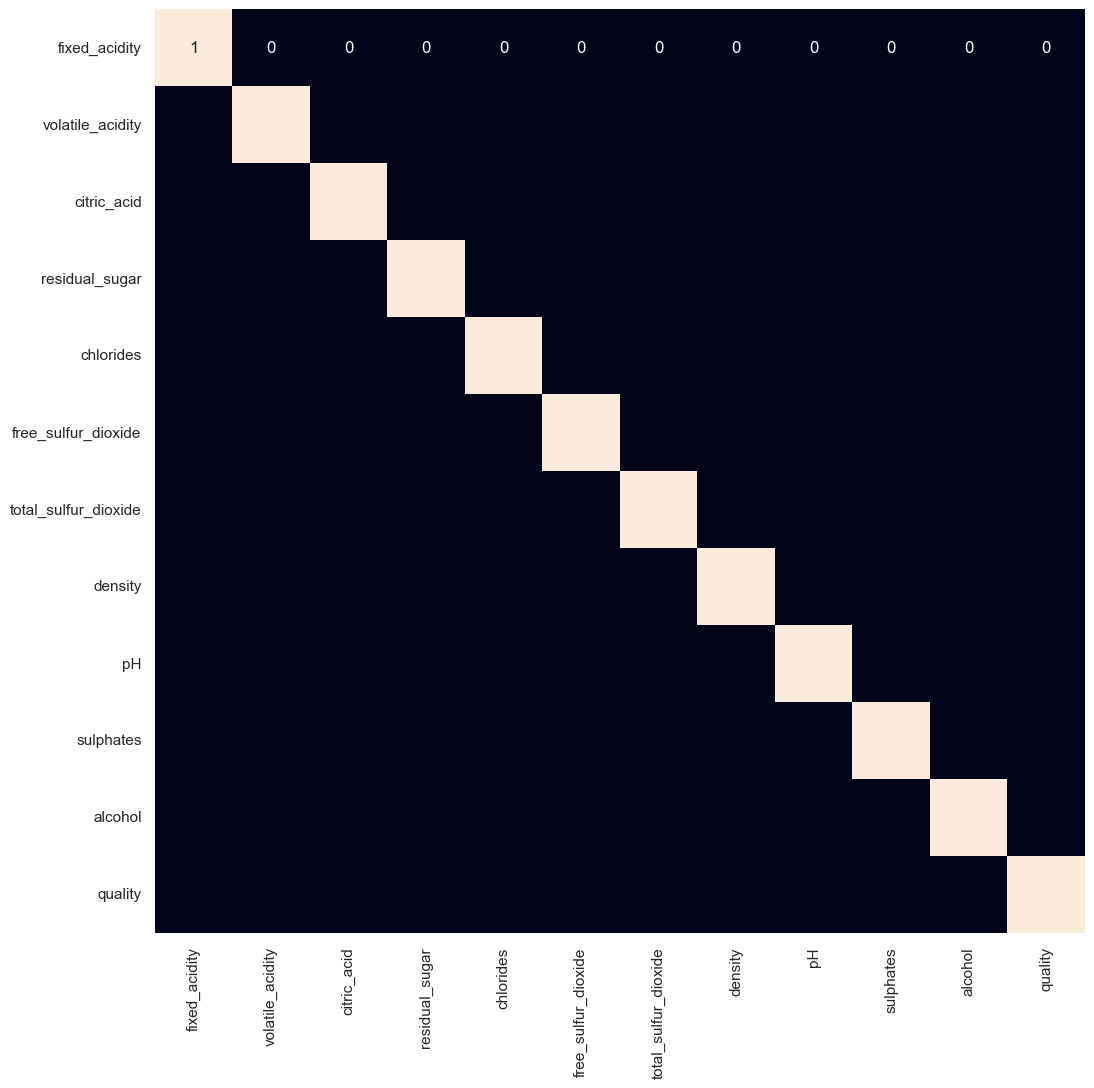

In [54]:
# cheek correlation > 0.7

plt.figure(figsize=(12, 12))
sns.heatmap(df.corr() > 0.7, annot=True, cbar=False)
plt.show()